<a href="https://colab.research.google.com/github/kiseonjeong/keras-ml/blob/cnn-cifar10/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 데이터 분류

In [1]:
import tensorflow.keras as keras
from tensorflow.keras import models, layers
from tensorflow.keras import backend

In [2]:
# 분류 CNN 모델링
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
        self.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy,
                     optimizer='rmsprop',
                     metrics=['accuracy'])

In [3]:
from tensorflow.keras import datasets

In [4]:
class DATA():
    def __init__(self):
        num_classes = 10

        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]

        if backend.image_data_format() == 'channels_first':
            print('image data format : channels_first')
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img.cols)
            input_shape = (1, img_rows, img_cols)
        else:
            print('image data format : channels_last')
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)

        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

In [5]:
%run 'drive/MyDrive/Colab Notebooks/Keras/skeras.ipynb'
%run 'drive/MyDrive/Colab Notebooks/Keras/sfile.ipynb'

In [6]:
import matplotlib.pyplot as plt

image data format : channels_last
Epoch 1/10
375/375 [==============================] - 7s 10ms/step - loss: 0.2439 - accuracy: 0.9249 - val_loss: 0.0747 - val_accuracy: 0.9783
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0852 - accuracy: 0.9743 - val_loss: 0.0497 - val_accuracy: 0.9858
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0648 - accuracy: 0.9811 - val_loss: 0.0455 - val_accuracy: 0.9872
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0566 - accuracy: 0.9835 - val_loss: 0.0427 - val_accuracy: 0.9887
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0520 - accuracy: 0.9853 - val_loss: 0.0446 - val_accuracy: 0.9872
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0497 - accuracy: 0.9857 - val_loss: 0.0411 - val_accuracy: 0.9893
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0447 - accuracy: 0.9866 - val_loss: 0

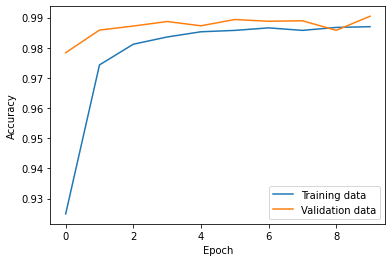

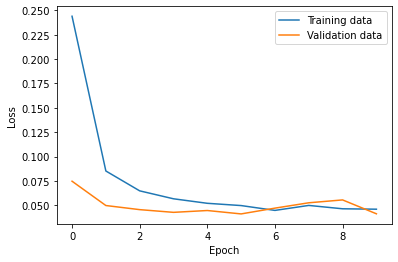

In [7]:
batch_size = 128
epochs = 10

data = DATA()
model = CNN(data.input_shape, data.num_classes)

history = model.fit(data.x_train, data.y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)

score = model.evaluate(data.x_test, data.y_test)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_acc(history)
plt.show()
plot_loss(history)
plt.show()

# CIFAR10 데이터 분류

In [8]:
from tensorflow.keras import backend as K
from tensorflow.keras import utils
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [9]:
# 분류 CNN 모델링
class CNN(Model):
    def __init__(model, nb_classes, in_shape=None):
        super().__init__()
        model.nb_classes = nb_classes
        model.in_shape = in_shape
        model.build_model()
        super().__init__(model.x, model.y)
        model.compile()

    def build_model(model):
        nb_classes = model.nb_classes
        in_shape = model.in_shape

        x = Input(in_shape)

        h = Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=in_shape)(x)
        h = Conv2D(64, (3, 3), activation='relu')(h)
        h = MaxPooling2D(pool_size=(2, 2))(h)
        h = Dropout(0.25)(h)
        h = Flatten()(h)
        z_cl = h

        h = Dense(128, activation='relu')(h)
        h = Dropout(0.5)(h)
        z_fl = h

        y = Dense(nb_classes, activation='softmax', name='preds')(h)

        model.cl_part = Model(x, z_cl)
        model.fl_part = Model(x, z_fl)

        model.x, model.y = x, y

    def compile(model):
        Model.compile(model, loss='categorical_crossentropy',
                      optimizer='adadelta', metrics=['accuracy'])

In [10]:
from sklearn import model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
# 분류 CNN을 위한 데이터 준비
class DataSet:
    def __init__(self, X, y, nb_classes, scaling=True,
                 test_size=0.2, random_state=0):
        self.X = X
        self.add_channels()

        X = self.X
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2,
                                                                            random_state=random_state)
        
        print(X_train.shape, y_train.shape)

        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')

        if scaling:
            scaler = MinMaxScaler()
            n = X_train.shape[0]
            X_train = scaler.fit_transform(X_train.reshape(n, -1)).reshape(X_train.shape)
            n = X_test.shape[0]
            X_test = scaler.transform(X_test.reshape(n, -1)).reshape(X_test.shape)
            self.scaler = scaler

        print('X_train shape:', X_train.shape)
        print(X_train.shape[0], 'train samples')
        print(X_test.shape[0], 'test samples')

        Y_train = utils.to_categorical(y_train, nb_classes)
        Y_test = utils.to_categorical(y_test, nb_classes)

        self.X_train, self.X_test = X_train, X_test
        self.Y_train, self.Y_test = Y_train, Y_test
        self.y_train, self.y_test = y_train, Y_test
    
    def add_channels(self):
        X = self.X

        if len(X.shape) == 3:
            N, img_rows, img_cols = X.shape

            if K.image_dim_ordering() == 'th':
                X = X.reshape(X.shape[0], 1, img_rows, img_cols)
                input_shape = (1, img_rows, img_cols)
            else:
                X = X.reshape(X.shape[0], img_rows, img_cols, 1)
                input_shape = (img_rows, img_cols, 1)
        else:
            input_shape = X.shape[1:]

        self.X = X
        self.input_shape = input_shape

In [12]:
# 분류 CNN의 학습 및 성능 평가를 위한 머신 클래스
class Machine():
    def __init__(self, X, y, nb_classes=2, fig=True):
        self.nb_classes = nb_classes
        self.set_data(X, y)
        self.set_model()
        self.fig = fig

    def set_data(self, X, y):
        nb_classes = self.nb_classes
        self.data = DataSet(X, y, nb_classes)
        print('data.input_shape', self.data.input_shape)

    def set_model(self):
        nb_classes = self.nb_classes
        data = self.data
        self.model = CNN(nb_classes=nb_classes, in_shape=data.input_shape)
        print('set model finished')

    def fit(self, epochs=10, batch_size=128, verbose=1):
        data = self.data
        model = self.model

        history = model.fit(data.X_train, data.Y_train,
                            batch_size=batch_size, epochs=epochs,
                            verbose=verbose,
                            validation_data=(data.X_test, data.Y_test))
        return history

    def run(self, epochs=100, batch_size=128, verbose=1):
        data = self.data
        model = self.model
        fig = self.fig

        history = self.fit(epochs=epochs,
                           batch_size=batch_size, verbose=verbose)
        
        score = model.evaluate(data.X_test, data.Y_test, verbose=0)

        print('Confusion matrix')
        Y_test_pred = model.predict(data.X_test, verbose=0)
        y_test_pred = np.argmax(Y_test_pred, axis=1)
        print(metrics.confusion_matrix(np.argmax(data.y_test, axis=1), y_test_pred))

        print('Test score:', score[0])
        print('Test accuracy:', score[1])

        # Save results
        suffix = unique_filename('datetime')
        foldname = 'output_' + suffix
        os.makedirs(foldname)
        save_history_history('history_history.npy', history.history, fold=foldname)
        model.save_weights(os.path.join(foldname, 'dl_model.h5'))
        print('Output results are saved in', foldname)

        if fig:
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plot_acc(history)
            plt.subplot(1, 2, 2)
            plot_loss(history)
            plt.show()

        self.history = history

In [13]:
from tensorflow.keras import datasets
import tensorflow.keras as keras
assert keras.backend.image_data_format() == 'channels_last'

(40000, 32, 32, 3) (40000, 1)
X_train shape: (40000, 32, 32, 3)
40000 train samples
10000 test samples
data.input_shape (32, 32, 3)
set model finished
Epoch 1/100
313/313 [==============================] - 4s 12ms/step - loss: 2.3086 - accuracy: 0.0997 - val_loss: 2.2968 - val_accuracy: 0.1251
Epoch 2/100
313/313 [==============================] - 3s 11ms/step - loss: 2.2987 - accuracy: 0.1133 - val_loss: 2.2887 - val_accuracy: 0.1196
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 2.2913 - accuracy: 0.1230 - val_loss: 2.2807 - val_accuracy: 0.1237
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 2.2840 - accuracy: 0.1346 - val_loss: 2.2730 - val_accuracy: 0.1350
Epoch 5/100
313/313 [==============================] - 3s 11ms/step - loss: 2.2772 - accuracy: 0.1435 - val_loss: 2.2650 - val_accuracy: 0.1545
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 2.2693 - accuracy: 0.1524 - val_loss: 2.2560 - val_ac

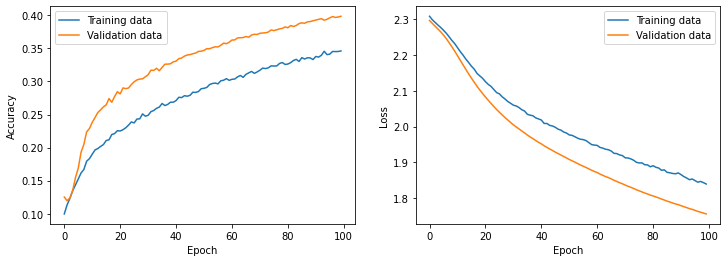

In [14]:
(X, y), (x_test, y_test) = datasets.cifar10.load_data()
m = Machine(X, y, nb_classes=10)
m.run()